<a href="https://colab.research.google.com/github/tinafanfan/My-Python/blob/main/My_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[https://colab.research.google.com/drive/1QjevIZ1CD4S4ss3et2n9eVAmqayW9Isf#scrollTo=M9V3qiIwPPLy](https://colab.research.google.com/drive/1QjevIZ1CD4S4ss3et2n9eVAmqayW9Isf#scrollTo=M9V3qiIwPPLy)

In [ ]:
import numpy as np
import pandas as pd

# New Section

# Read dataset

In [ ]:
# The sklearn.datasets module includes utilities to load datasets, including methods to load and fetch popular reference datasets.
from sklearn import datasets
iris = datasets.load_iris() # a 150x4 numpy.ndarray
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

# Numpy


## np.ix_

Construct an open mesh from multiple sequences using the function `np.ix_`.

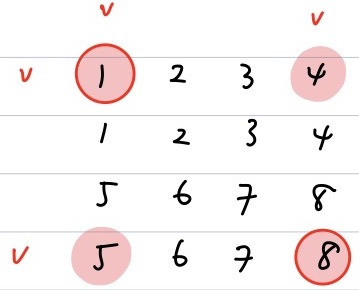

In [ ]:
ind = np.array([0,3])
X = np.array([(1, 2, 3, 4), (1, 2, 3, 4), (5, 6, 7, 8), (5, 6, 7, 8)], dtype = float)
print(X)
print(X[ind, ind]) # diagonal elements - red circle
print(X[np.ix_(ind, ind)]) # a mesh - red highlight color

[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [5. 6. 7. 8.]
 [5. 6. 7. 8.]]
[1. 8.]
[[1. 4.]
 [5. 8.]]


## inverse

In [ ]:
A = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])

# Calculating the inverse of the matrix
print(np.linalg.inv(A))

[[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]


## concatenate

You can use the numpy.concatenate() function to concat, merge, or join a sequence of two or multiple arrays into a single NumPy array.
https://sparkbyexamples.com/numpy/numpy-concatenate-arrays/

In [ ]:
# 1-D
arr = np.array([0, 1, 2])
print(arr)
print(arr.shape)

# 2-D
arr1 = np.array([[3, 4, 5]])
print(arr1)
print(arr1.shape)

# 3-D
arr2 = np.array([[[0,1,2],[3, 4, 5]]])
print(arr2)
print(arr2.shape)

[0 1 2]
(3,)
[[3 4 5]]
(1, 3)
[[[0 1 2]
  [3 4 5]]]
(1, 2, 3)


In [ ]:
con = np.concatenate((arr, arr))
print(con)
print(con.shape)
con = np.concatenate((arr1, arr1))
print(con)
print(con.shape)
con = np.concatenate((arr2, arr2))
print(con)
print(con.shape)

[0 1 2 0 1 2]
(6,)
[[3 4 5]
 [3 4 5]]
(2, 3)
[[[0 1 2]
  [3 4 5]]

 [[0 1 2]
  [3 4 5]]]
(2, 2, 3)


In [ ]:
# concatenate two NumPy arrays column-wise by specifying axis=1
# con = np.concatenate((arr, arr), axis = 1)
# print(con)
# print(con.shape)
con = np.concatenate((arr1, arr1), axis = 1)
print(con)
print(con.shape)
con = np.concatenate((arr2, arr2), axis = 1)
print(con)
print(con.shape)

[[3 4 5 3 4 5]]
(1, 6)
[[[0 1 2]
  [3 4 5]
  [0 1 2]
  [3 4 5]]]
(1, 4, 3)


In [ ]:
con = np.hstack((arr, arr))
print(con)
print(con.shape)
con = np.hstack((arr1, arr1))
print(con)
print(con.shape)
con = np.hstack((arr2, arr2))
print(con)
print(con.shape)

[0 1 2 0 1 2]
(6,)
[[3 4 5 3 4 5]]
(1, 6)
[[[0 1 2]
  [3 4 5]
  [0 1 2]
  [3 4 5]]]
(1, 4, 3)


In [ ]:
con = np.vstack((arr, arr))
print(con)
print(con.shape)
con = np.vstack((arr1, arr1))
print(con)
print(con.shape)
con = np.vstack((arr2, arr2))
print(con)
print(con.shape)

[[0 1 2]
 [0 1 2]]
(2, 3)
[[3 4 5]
 [3 4 5]]
(2, 3)
[[[0 1 2]
  [3 4 5]]

 [[0 1 2]
  [3 4 5]]]
(2, 2, 3)


In [ ]:
con = np.stack((arr, arr))
print(con)
print(con.shape)
con = np.stack((arr1, arr1))
print(con)
print(con.shape)
con = np.stack((arr2, arr2))
print(con)
print(con.shape)

[[0 1 2]
 [0 1 2]]
(2, 3)
[[[3 4 5]]

 [[3 4 5]]]
(2, 1, 3)
[[[[0 1 2]
   [3 4 5]]]


 [[[0 1 2]
   [3 4 5]]]]
(2, 1, 2, 3)


In [ ]:
con = np.dstack((arr, arr)) # Stacking Along Height (depth)
print(con)
print(con.shape)
con = np.dstack((arr1, arr1))
print(con)
print(con.shape)
con = np.dstack((arr2, arr2))
print(con)
print(con.shape)

# Matplotlib

In [ ]:
import matplotlib.pyplot as plt

([], <a list of 0 Text major ticklabel objects>)

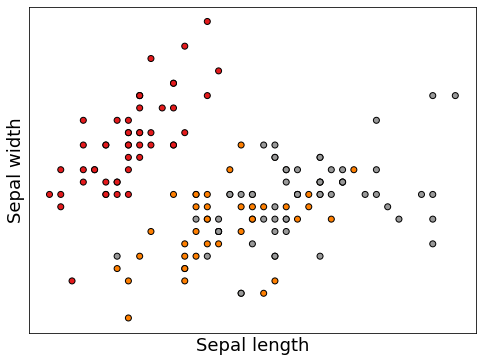

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
# num：圖像編碼或者名稱，數字是編碼，字符串是名稱
# figsize：寬和高，單位是英尺
# dpi：指定繪圖對象的分辨率，即每英寸多少個像素，缺省值為80
# facecolor：背景顏色
# edgecolor：邊框顏色
# frameon：是否顯示邊框

plt.clf() # clear the current figure

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length", size=18)
plt.ylabel("Sepal width", size=18)

plt.xticks(())
plt.yticks(())

# plt.title('y')
# plt.colorbar()
# plt.show()

# Seaborn

這個套件看起來是要用 pandas 的 dataframe

https://seaborn.pydata.org/tutorial/introduction.html


In [ ]:
import seaborn as sns

In [ ]:
# np.array -> pd.dataframe
iris_df = pd.DataFrame(iris.data)
# add a new column to the end of a pandas DataFrame
iris_df = iris_df.assign(target = iris.target)
# add column names to a pd df
iris_df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Labels']
iris_df.columns[0]

'Sepal length'

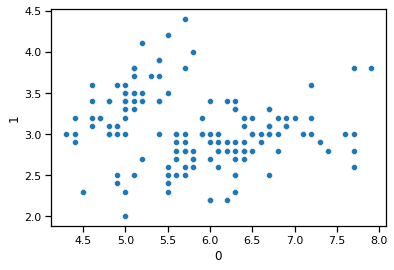

In [ ]:
sns.set_context("notebook")
# sns.scatterplot(x="Sepal length",
#                 y="Sepal width",
#                 data=iris_df)



sns.scatterplot(x = iris_df[iris_df.columns[0]], y = iris_df[iris_df.columns[1]])


We can make scatter plots with Penguin data using Seaborn’s scatterplot() function and  improve the simple version using:

1. increase **the figure size** using plt.figure(figsize=(10,8)) function
2. increase **Axes tick labels** using Seaborn’s set_context() function for all the plots in the notebook
3. increase **the data point size** in the scatter plot using the argument “s” in Seaborn’s scatterplot() function
4. change **the axis labels and their sizes** using xlabel() and ylabel() functions in Matplotlib


Text(0.5, 1.0, 'Iris dataset')

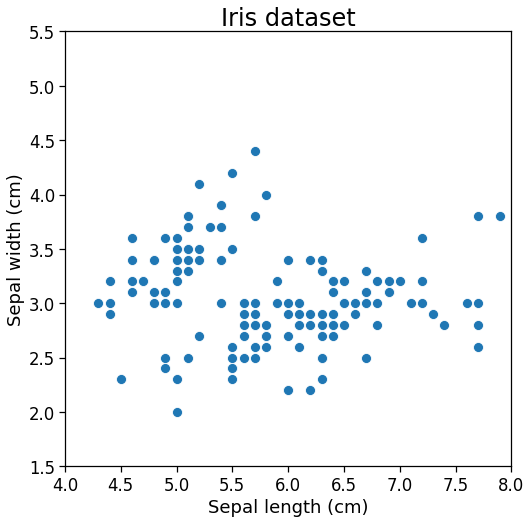

In [ ]:
plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5)
sns.scatterplot(x="Sepal length",
                y="Sepal width",
                data=iris_df,
                s=100)
plt.xlim(4, 8)
plt.ylim(1.5, 5.5)
plt.xlabel("Sepal length (cm)", size=18)
plt.ylabel("Sepal width (cm)", size=18)
plt.title("Iris dataset", fontdict=None, loc='center', size=24)

We can **change the colors of data points** on the scatter plot **by a variable** in the dataframe using “hue” argument in Seaborn’s scatterplot() function.


Text(0, 0.5, 'Sepal width (cm)')

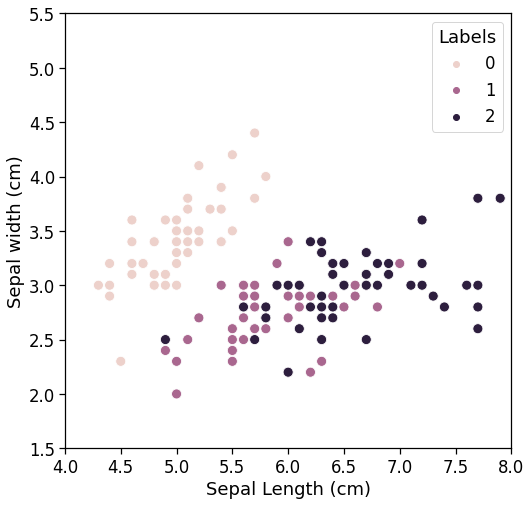

In [ ]:
plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5)
sns.scatterplot(x="Sepal length",
                y="Sepal width",
                s=100,
                hue="Labels",
                data=iris_df)
plt.xlim(4, 8)
plt.ylim(1.5, 5.5)
plt.xlabel("Sepal Length (cm)", size=18)
plt.ylabel("Sepal width (cm)", size=18)

# Torch

## slice tensor

In [ ]:
# The data changes [4, 161, 325] → [4, 161, 324] by removing the first element in the 3rd dimension
import torch

# ver 1
a = torch.randn(4, 161, 325)
b = a[:, :, 1:]
b.shape
# ver 2
a = torch.rand(4,161,325)
b = a[..., 1:]            # or t = t[Ellipsis, 1:] Here, Ellipsis indicate rest of dims
b.shape

# Useful


## read files

In [ ]:
# read csv file
path = "/Users/folder"
with open(os.path.join(path, 'sub-fulder',"filename.csv"), 'r', encoding='UTF-8-sig') as data_file:

    csv_data = csv.reader(data_file, delimiter=',')
    next(csv_data, None) # skip one item(row) before your loop, simply call next(data, None)
    data = {} # dictionary

    for row in csv_data:
        # first column = key, second and third column = values
        data[row[0]] = (float(row[1]), float(row[2]))

    return data

## dictionary

In [ ]:
# Get dictionary keys as a list
def getList(dict):
    return dict.keys()
dict = {1:'Geeks', 2:'for', 3:'geeks'}
print(getList(dict))

## for

In [ ]:
# Stop a for loop when i == 3
for i in range(10):
    if (i==3):
        break

## type conversion

In [ ]:
import numpy as np
import torch


list = [1,2,3]
tensor = torch.tensor([0, 1])
ndarray = np.array([1,2,3])

# list to torch.Tensor
tensor=torch.Tensor(list)
# list to numpy
ndarray = np.array(list)

# torch.Tensor to numpy
ndarray = tensor.numpy()
# torch.Tensor to list
list = tensor.numpy().tolist() # 先转 numpy，后转 list

# numpy to torch.Tensor
tensor = torch.from_numpy(ndarray)
# numpy to list
list = ndarray.tolist()

## string

In [ ]:
# Does a list or a string contain a specific string?
"foo" in "foobar"

"foo" in ["bar", "foo", "foobar"]

"Foo" not in ["bar", "foo", "foobar"]

## iterator

In [ ]:
# source: https://www.w3schools.com/python/python_iterators.asp

# show usage of iter() and next()
# An iterator is an object that contains a countable number of values.
# Lists, tuples, dictionaries, and sets are all iterable objects. They are iterable containers which you can get an iterator from.
# All these objects have a iter() method which is used to get an iterator.
mytuple = ("apple", "banana", "cherry")
myit = iter(mytuple)
print(next(myit))

# create an iterator
class MyNumbers:
    def __iter__(self):
        self.a = 1
        return self

    def __next__(self):
        x = self.a
        self.a += 2
        return x

myclass = MyNumbers()
myiter = iter(myclass)
print(next(myiter)) # 1
print(next(myiter)) # 3

# create an iterator with StopIteration that avoid unlimit iteration
class MyNumbers:
    def __iter__(self):
        self.a = 1
        return self

    def __next__(self):
        if self.a <= 20:
            x = self.a
            self.a += 1
            return x
    else:
        raise StopIteration

myclass = MyNumbers()
myiter = iter(myclass)

for x in myiter:
    print(x) # 1,2,...,20

## List

## List comprehensions
List comprehensions are one of Python's most beloved and unique features. The easiest way to understand them is probably to just look at a few examples:


In [ ]:

squares = [n**2 for n in range(10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
short_planets = [planet for planet in planets if len(planet) < 6]
short_planets

['Venus', 'Earth', 'Mars']


The "brackets" constructs a new list from an old one, this is called [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions).

The basic idea with `[f(x) for x in xs if condition]` is:
```python
def list_comprehension(xs):
    result = []
    for x in xs:
        if condition:
            result.append(f(x))
    return result
```
The f(x) can be any expression, containing x or not.

#ifelse

In [ ]:
# total_candies = 91
total_candies = 1

if total_candies == 1:
    print("Splitting 1 candy")
else:
    print("Splitting", total_candies, "candies")

# Here's a slightly more succinct solution using a conditional expression:
print("Splitting", total_candies, "candy" if total_candies == 1 else "candies")

Splitting 1 candy
Splitting 1 candy


# Optuna

1. 多個模型寫在一起的 example [link](https://neptune.ai/blog/optuna-guide-how-to-monitor-hyper-parameter-optimization-runs)
2. 簡單的explanantion [link](https://ithelp.ithome.com.tw/articles/10276835?sc=iThelpR)

DS_HW_6 和 DS_HW_7 都有練習

# Pandas

Summary Functions and Maps
`map`
`lamda`
`apply`

In [ ]:
grades = {
    "name": ["Mike", "Sherry", "Cindy", "John"],
    "math": [80, 75, 93, 86],
    "chinese": [63, 90, 85, 70]
}

df = pd.DataFrame(grades)

In [ ]:
df.loc[:,'name']

0      Mike
1    Sherry
2     Cindy
3      John
Name: name, dtype: object

In [ ]:
df

,name,math,chinese
0,Mike,80,63
1,Sherry,75,90
2,Cindy,93,85
3,John,86,70
